# Non-linear Normalization for Sparse Data

###### Proposed Method:
- Clip the histogram values in a shorter range;
- Normalization between -1 and 1;
- $f(x) = sign(x) |x|^p$

###### Drawbacks:
- the method is not invertible;
- it seems to be suitable with real values, not with complex ones;

In [1]:
## Import Modules ##
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [2]:
## Functions ##

def clip_normalize_power(in_content, mi, mx, p):
    """
    Forward normalization using hard clip, normalization and power
    
    :param in_content: data to be processed
    :param mi: min value for clipping
    :param mx: max value for clipping
    :param p: exponent for the power function
    :return: normalized hard clipped image
    """
    in_content = np.clip(in_content, a_min=mi, a_max=mx) #hard clip
    in_content = 2 * (in_content - in_content.min()) / (in_content.max() - in_content.min()) - 1
    in_content = np.power(np.abs(in_content), p)
    return in_content

def sigm_clip_normalize_power(in_content, mi, mx, p):
    """
    Forward normalization using sigmoid approximation of hard clip, normalization and power
    
    :param in_content: data to be processed
    :param mi: min value for sigmoid function
    :param mx: max value for sigmoid function
    :param p: exponent for the power function
    :return: normalized soft clipped image
    """
    in_content =  mi + (mx-mi)*(lambda t: (1+80**(-t+0.5))**(-1) )( (in_content-mi)/(mx-mi) )  #sigmoid soft clip
    in_content = 2 * (in_content - np.min(in_content)) / (np.max(in_content) - np.min(in_content)) - 1
    in_content = np.power(np.abs(in_content), p)
    return in_content

def sigm_clip_normalize_exp(in_content, mi, mx, p):
    """
    :param in_content: data to be processed
    :param mi: min value for sigmoid function
    :param mx: max value for sigmoid function
    :param p: exponent for the power function
    :return: normalized soft clipped image
    """
    in_content = mi + (mx - mi) / (1 + np.exp(0.5 - (in_content - mi) / (mx - mi)))
    in_content = 2 * (in_content - np.min(in_content)) / (np.max(in_content) - np.min(in_content)) - 1
    in_content = np.sign(in_content) * np.power(np.abs(in_content), p)
    return in_content

def inv_sigm_clip_normalize_power(in_content, mi, mx, p):
    """
    :param in_content: data to be processed
    :param mi: min value used for inverting sigmoid
    :param mx: max value used for inverting sigmoid
    :param p: exponent for the power function (to be inverted)
    :return: original image
    """
    in_content = np.power(np.abs(in_content), 1/p)
    in_content = (in_content + 1) * (mx - mi) / 2 + mi
    t = np.log((mx-mi)/(in_content-mi)-1)/np.log(80)
    in_content = mi + (mx-mi)*(0.5-t)
    return in_content

def inv_sigm_clip_normalize_exp(in_content, mi, mx, p):
    """
    :param in_content: data to be processed
    :param mi: min value used for inverting sigmoid
    :param mx: max value used for inverting sigmoid
    :param p: exponent for the power function (to be inverted)
    :return: original image
    """
    in_content = np.sign(in_content) * np.power(np.abs(in_content), 1/p)
    in_content = (in_content + 1) * (mx - mi) / 2 + mi
    in_content = (in_content - mi)/(mx - mi)
    in_content = 1 / in_content
    in_content = in_content - 1
    in_content = np.log(in_content)
    in_content = 0.5 - in_content
    in_content = mi + (mx - mi) * in_content
    return in_content

In [3]:
## Load Data ##
path = 'C:/Users/enric/PycharmProjects/datasets/synth_frf_free_512x512x32.mat'
data = io.loadmat(path)

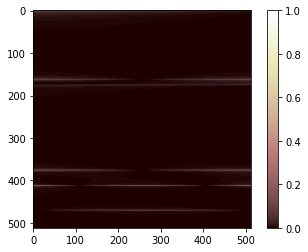

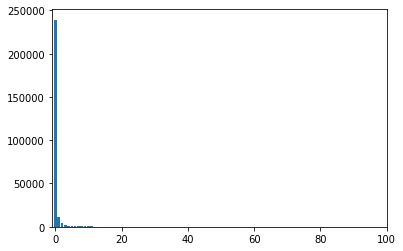

0.0 1.0


In [4]:
## Original Data ##
f = data['freq']
x = data['x']
y = data['y']
frfs = data['frfs']

image = np.abs(frfs[:,:,31])
image = image/np.max(image)

plt.imshow(image, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.xlim(-1,100)
plt.show()

print(image.min(), image.max())

In [5]:
mi = -0.1
mx = 0.1
p = .33

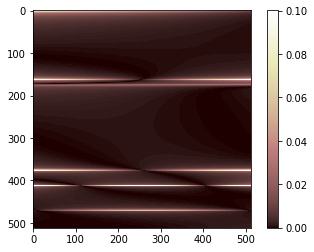

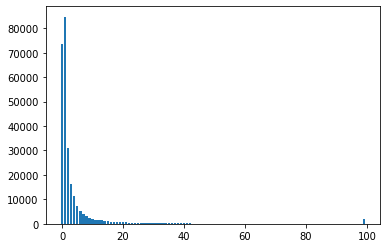

0.0 0.10009000000000001


In [6]:
image_clip = np.zeros(image.shape)

i,j = np.where(image < mi)
image_clip[i, j] = 1e-4 * image[i, j] + (1 - 1e-4) * mi
i,j = np.where(image > mx)
image_clip[i, j] = 1e-4 * image[i, j] + (1 - 1e-4) * mx
i,j = np.where((image >= mi) & (image <= mx))
image_clip[i, j] = image[i, j]

plt.imshow(image_clip, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_clip, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_clip.min(), image_clip.max())

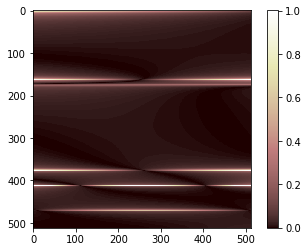

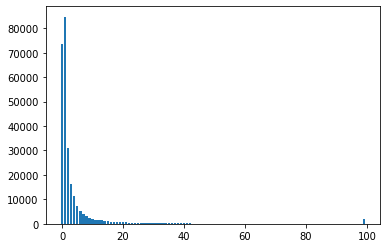

0.0 1.0009000000000001


In [7]:
image_clip_norm = 2 * (image_clip - mi) / (mx - mi) - 1

plt.imshow(image_clip_norm, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_clip_norm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_clip_norm.min(), image_clip_norm.max())

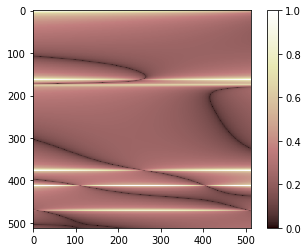

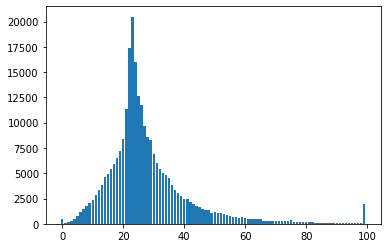

0.0 1.0002969104993353


In [8]:
image_clip_pow = np.sign(image_clip_norm) * np.power(np.abs(image_clip_norm), p)

plt.imshow(image_clip_pow, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_clip_pow, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_clip_pow.min(), image_clip_pow.max())

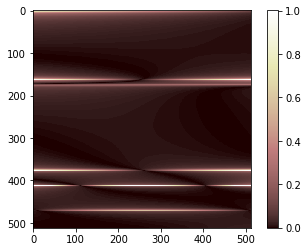

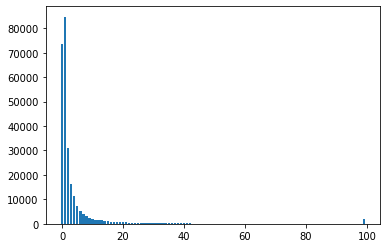

0.0 1.0009


In [9]:
image_inv_pow = np.sign(image_clip_pow) * np.power(np.abs(image_clip_pow), 1/p)

plt.imshow(image_inv_pow, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_inv_pow, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_inv_pow.min(), image_inv_pow.max())

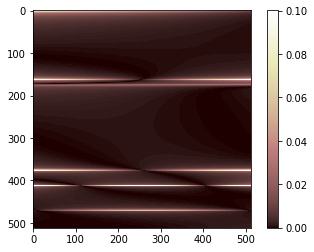

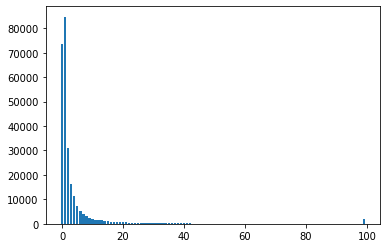

0.0 0.10008999999999998


In [10]:
image_inv_norm = (image_inv_pow + 1) * (mx - mi) / 2 + mi

plt.imshow(image_inv_norm, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_inv_norm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_inv_norm.min(), image_inv_norm.max())

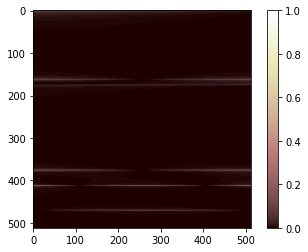

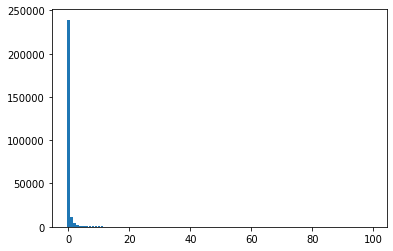

0.0 0.9999999999997511


In [11]:
image_inv = np.zeros(image_inv_norm.shape)

i,j = np.where(image < mi)
image_inv[i, j] = (image_inv_norm[i, j] - (1 - 1e-4) * mi) / 1e-4
i,j = np.where(image > mx)
image_inv[i, j] = (image_inv_norm[i, j] - (1 - 1e-4) * mx) / 1e-4
i,j = np.where((image >= mi) & (image <= mx))
image_inv[i, j] = image_inv_norm[i, j]

plt.imshow(image_inv, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_inv, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

print(image_inv.min(), image_inv.max())

C:\Users\enric\miniconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


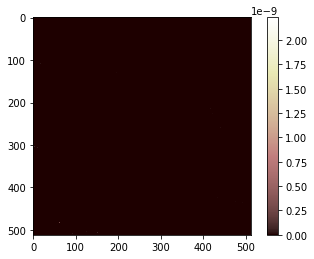

In [12]:
plt.imshow(np.abs(image_inv-image)/image, cmap='pink')
plt.colorbar()
plt.show()

### Hard Clip with magnitudes

In [13]:
## Clipping Parameters ##
mi = -1e-2
mx = 1e-2
p = .33

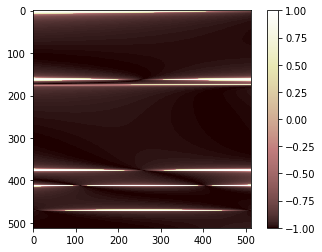

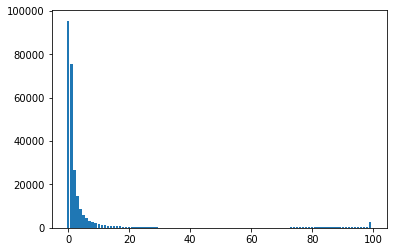

In [14]:
image_clip = sigm_clip_normalize_exp(image, mi, mx, p)

plt.imshow(image_clip, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_clip, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

C:\Users\enric\miniconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


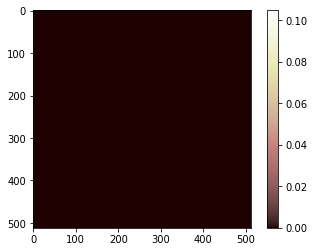

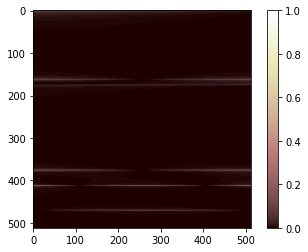

C:\Users\enric\miniconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


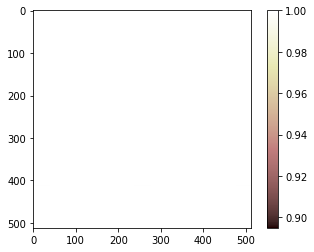

In [15]:
image_clip = inv_sigm_clip_normalize_exp(image, mi, mx, p)

plt.imshow(image_clip, cmap='pink')
plt.colorbar()
plt.show()

plt.imshow(image, cmap='pink')
plt.colorbar()
plt.show()

plt.imshow(np.abs(image_clip-image)/image, cmap='pink')
plt.colorbar()
plt.show()

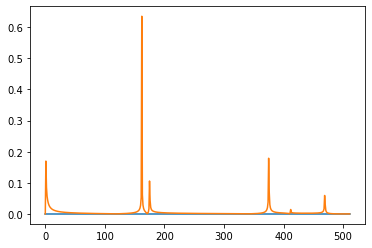

In [16]:
plt.plot(image_clip[:,100]/np.max(image_clip))
plt.plot(image[:,100])
plt.show()

##### Whole Normalization

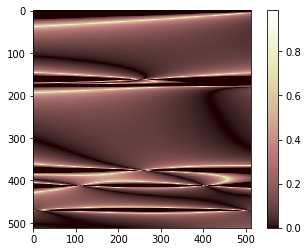

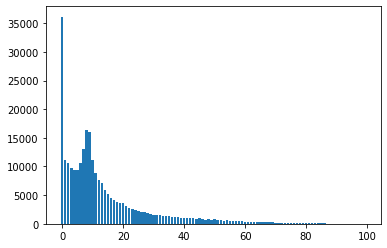

In [17]:
image_clip = 1 - clip_normalize_power(image, mi, mx, p)

plt.imshow(image_clip, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(image_clip, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Only Clip

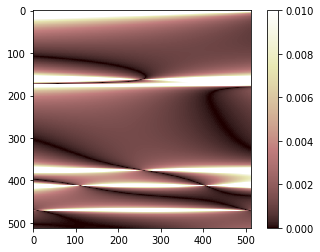

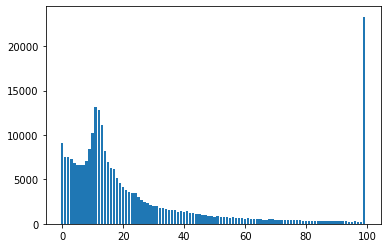

In [18]:
test_clip = np.clip(image, a_min=mi, a_max=mx)

plt.imshow(test_clip, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_clip, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Normalization Between -1 and 1

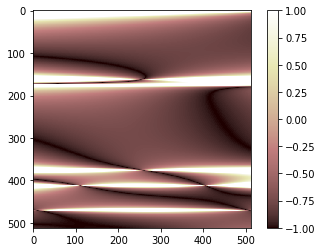

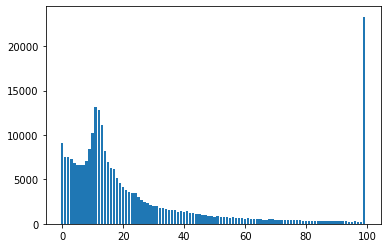

In [19]:
test_clip_norm = 2 * (test_clip - np.min(test_clip)) / (np.max(test_clip) - np.min(test_clip)) - 1

plt.imshow(test_clip_norm, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_clip_norm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Exponentiation (without sign)

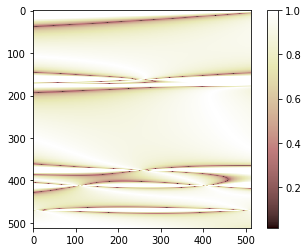

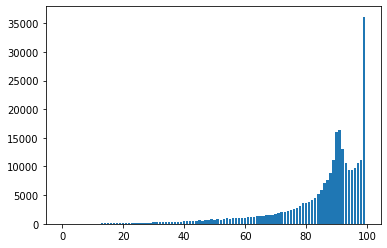

In [20]:
test_clip_exp = np.power(np.abs(test_clip_norm), p)

plt.imshow(test_clip_exp, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_clip_exp, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Exponentiation (with sign)

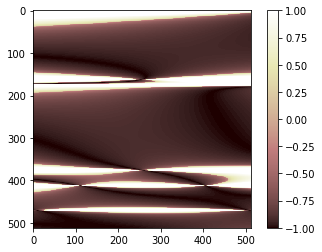

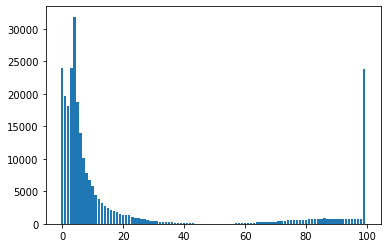

In [21]:
test_clip_exp = np.sign(test_clip_norm) * np.power(np.abs(test_clip_norm), p)

plt.imshow(test_clip_exp, cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_clip_exp, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

### Sigmoid Clip with magnitudes

##### Whole Normalization

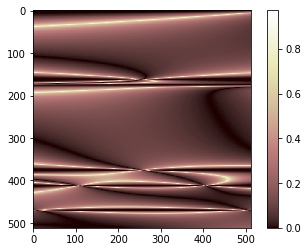

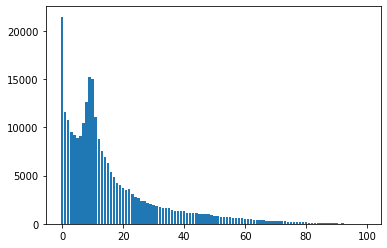

In [22]:
test_sigm = 1 - sigm_clip_normalize_power(image, mi, mx, p)

plt.imshow(np.abs(test_sigm), cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_sigm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Only Clip

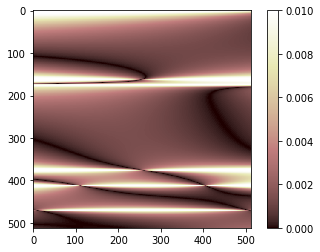

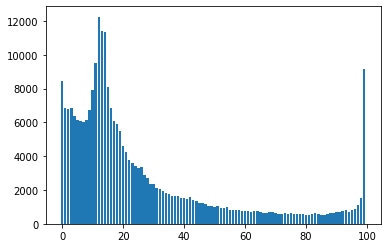

In [23]:
test_sigm = mi + (mx-mi)*(lambda t: (1+80**(-t+0.5))**(-1) )( (image-mi)/(mx-mi) )

plt.imshow(np.abs(test_sigm), cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_sigm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

C:\Users\enric\miniconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


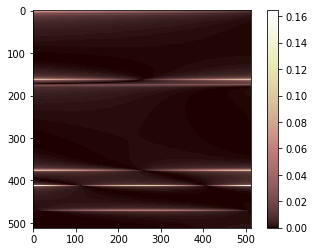

C:\Users\enric\miniconda3\envs\dip\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


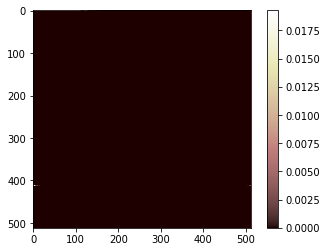

In [24]:
x_inv = (test_sigm - mi)/(mx-mi)
x_inv = 1/x_inv
x_inv = x_inv - 1
x_inv = np.log(x_inv)/np.log(80)
x_inv = 0.5 - x_inv
x_inv = mi + (mx-mi)*x_inv

plt.imshow(x_inv, cmap='pink')
plt.colorbar()
plt.show()

plt.imshow(np.abs(x_inv-image)/image, cmap='pink')
plt.colorbar()
plt.show()

##### Normalization between -1 and 1

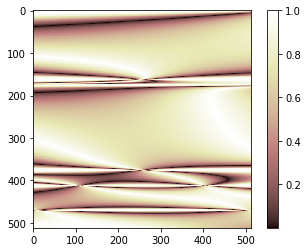

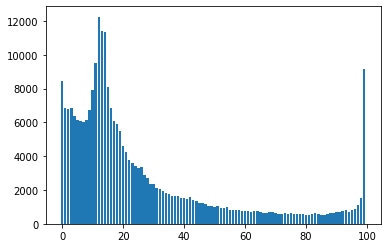

In [25]:
test_sigm_norm = 2 * (test_sigm - np.min(test_sigm)) / (np.max(test_sigm) - np.min(test_sigm)) - 1

plt.imshow(np.abs(test_sigm_norm), cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_sigm_norm, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Exponentiation (without sign)

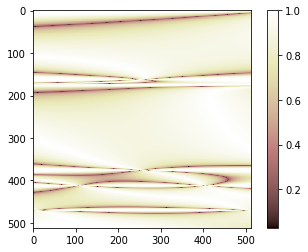

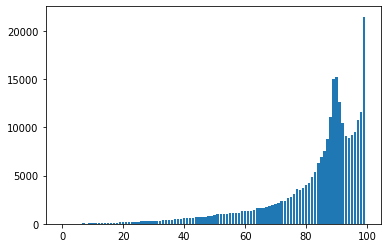

In [26]:
test_sigm_exp = np.power(np.abs(test_sigm_norm), p)

plt.imshow(np.abs(test_sigm_exp), cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_sigm_exp, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

##### Exponentiation (with sign)

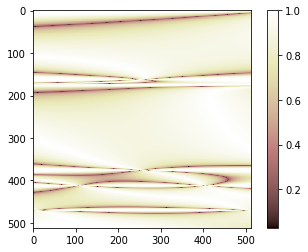

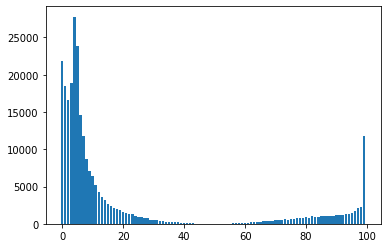

In [27]:
test_sigm_exp = np.sign(test_sigm_norm) * np.power(np.abs(test_sigm_norm), p)

plt.imshow(np.abs(test_sigm_exp), cmap='pink')
plt.colorbar()
plt.show()

h, b = np.histogram(test_sigm_exp, bins=100)
plt.bar(np.arange(h.shape[0]), h)
plt.show()

### 2D Example

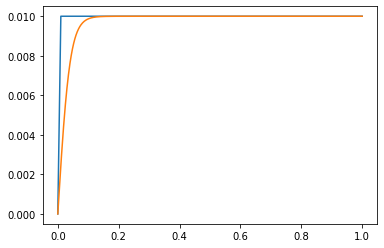

In [28]:
x_test = np.linspace(0, 1, 1000);
x_clip = np.clip(x_test, a_min=mi, a_max=mx)
x_sigm = mi + (1/(1 + np.exp(0.5-((x_test-mi)/(mx-mi)))))*(mx-mi)

plt.plot(x_test, x_clip)
plt.plot(x_test, x_sigm)
plt.show()

### Histogram Stretching

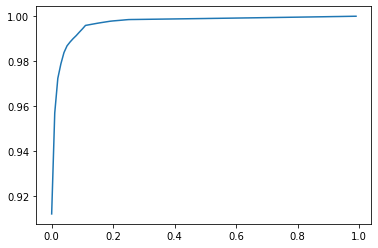

In [29]:
h, b = np.histogram(image, bins=100)
hcum = np.cumsum(h/np.sum(h))
plt.plot(b[:-1], hcum)
plt.show()

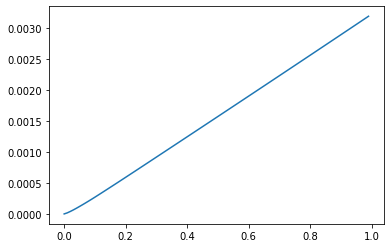

In [30]:
heq = (hcum-np.min(hcum))/(512*512-np.min(hcum))*99
plt.plot(b[:-1], np.cumsum(heq))
plt.show()